# <span style="color:#002e63">Capstone Project - The Battle of the Neighborhoods (Week 2)</span>
### <span style="color:#002e63"> Finding the most suitable locations for opening a lunch restaurant in Yerevan </span>
### <span style="color:#002e63"> Applied Data Science Capstone by IBM/Coursera </span>

## <span style="color:#002e63">Table of contents </span>
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# <span style="color:#002e63">Introduction: Business Problem <a name="introduction"></a></span>

This project is aimed at finding an optimal location for a restaurant which will offer mainly business lunches for its customers. The area of interest is the downtown of Yerevan, capital of Armenia. Although Food and beverage service has been growing at a higher rate in Yerevan over the last years due to domestic demand as well as the growth of touristic inflows, there is still a gap between demand and supply in reasonable and high quality lunch restaurants. The majority of newly opened restaurants in Yerevan are either fast food restaurants or not affordable for ordinary citizens. Conducting a survey among the workers from different industries and locations it was evident that majority of them share the same concerns stating that the quality and the service of lunch restaurants are not satisfactory. Moreover, queues were mentioned as another serious problem which is due to the lack of lunch restaurants nearby crowded areas.
So, in this project we are going to find the most suitable locations for opening a lunch restaurant which can be beneficial for both the customers and the investors.

At first we are going to find all the restaurants operating in downtown of Yerevan, then detect those which offer lunch menus. The most suitable **locations could be those which are either less crowded with restaurants or mostly have food chains with lower quality as well as those where the number of indirect competitors is comparably lower. The proxy measure of demand factor should be cosidered as well by taking into consideration how croweded are that locations with offices and governmnet and municipal buildings as the target customers of these restaurants are office workers**. 

# <span style="color:#002e63"> Data <a name="data"></a></span>

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood,
* number of and the quality as well as the popularity and price segment of the restaurants offering lunch menus in the   neighborhood,
* the number of indirect competitors,
* the locations with most crowded workplaces.

We decided to use regularly spaced grid of locations, centered around city center (Republic Square), to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* number of restaurants and their type, location, menu, rating in every neighborhood will be obtained using **Foursquare API**
* most popular Foursquare Food chains in Yerevan, Armenia will be obtained using **https://www.4sqstat.com**

### Import libraries
Let's first import the required libraries.

In [82]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt
%matplotlib inline

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D' #Foursquare ID
CLIENT_SECRET = 'H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO' #Foursquare Secret
VERSION = '20190901'
LIMIT = 100
categoryId='4d4b7105d754a06374d81259' #food category
#'4bf58dd8d48988d1c4941735,4bf58dd8d48988d16e941735,4bf58dd8d48988d1ca941735,4bf58dd8d48988d128941735,52e81612bcbc57f1066b79f4/
#2e81612bcbc57f1066b79f1, 4bf58dd8d48988d16c941735'
#restaurant,fast food,pizza, cafeteria, buffet, bistro, burger joint,
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D
CLIENT_SECRET:H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

We're interested in venues in 'food' category, but only those that offer lunch menu regardeless of their categories.
Since while using Foursquare API the number of returning results is up to 50, we will divide the downtown of Yerevan into six parts, then we will get the venues for each neighborhood. Finally, we will join them and drop duplicates as some venues may be overlapped. As a result, we will get all the venues in food category. Afterwards, we will detect those venues which are of our interest.

####  Convert address to its latitude and longitude coordinates.
#### In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [3]:
address=['Amiryan street, Yerevan','Koryun street, Yerevan','Saryan street, Yerevan','Mashtots street,Yerevan','Abovyan street, Yerevan','Vazgen Sargsyan street, Yerevan']
radius =600
geolocator = Nominatim(user_agent="foursquare_agent")
latitude=[]
longitude=[]
url=[]
for i in address:
    location = geolocator.geocode(i)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
for i,j in zip(latitude,longitude):
    url.append('https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&intent=browse&radius={}&limit={}'\
    .format(categoryId,CLIENT_ID, CLIENT_SECRET, i, j, VERSION,radius, LIMIT)) 


In [4]:
url

['https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&ll=40.1809185,44.5077771&v=20190901&intent=browse&radius=600&limit=100',
 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&ll=40.19001,44.521103&v=20190901&intent=browse&radius=600&limit=100',
 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&ll=40.1866194,44.5084939&v=20190901&intent=browse&radius=600&limit=100',
 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTK

In [5]:
# assign relevant part of JSON to venues and tranform venues into a dataframe
venues=requests.get(url[0]).json()['response']['venues']
dataframe1=json_normalize(venues)
dataframe1.tail()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
45,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",False,4fb7333e0cd6ea3ca10cefdd,24 Saryan str.,AM,Երևան,Հայաստան,Crossing with Amiryan str.,396,"[24 Saryan str. (Crossing with Amiryan str.), ...","[{'label': 'display', 'lat': 40.18377733110400...",40.183777,44.505002,NaN,0002,Yerevan,Vienna Ribs,v-1569944272,NaN
46,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",False,5225e99c11d21994bd45c9c9,Teryan 19,AM,Երևան,Հայաստան,NaN,561,"[Teryan 19, 0001, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.18237089149241...",40.182371,44.514099,NaN,0001,Yerevan,Paulaner Teryan,v-1569944272,NaN
47,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",False,4dc023afcda12687c843b5fe,NaN,AM,Երևան,Հայաստան,NaN,523,"[Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.17649127402512...",40.176491,44.505688,NaN,NaN,Yerevan,Tabule,v-1569944272,NaN
48,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,5d273d4cc56f480023e65e1f,Arame Street,AM,Երևան,Հայաստան,NaN,190,"[Arame Street, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.182413, 'lng':...",40.182413,44.508871,NaN,NaN,Yerevan,Seasons Restaurant,v-1569944272,NaN
49,"[{'id': '52e81612bcbc57f1066b79f1', 'name': 'B...",False,58b1c6e4d0bb3e3306964c93,NaN,AM,NaN,Հայաստան,NaN,562,[Հայաստան],"[{'label': 'display', 'lat': 40.185955, 'lng':...",40.185955,44.507220,NaN,NaN,NaN,OST Food Court,v-1569944272,NaN


In [6]:
# assign relevant part of JSON to venues and tranform venues into a dataframe
venues=requests.get(url[1]).json()['response']['venues']
dataframe2=json_normalize(venues)
dataframe2.tail()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
35,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,4f6d7b75e4b0e3b3bcfdf1f5,NaN,AM,NaN,Հայաստան,NaN,178,[Հայաստան],"[{'label': 'display', 'lat': 40.19082012271279...",40.190820,44.519286,NaN,NaN,Granatus,v-1569944273,NaN
36,"[{'id': '4bf58dd8d48988d10d941735', 'name': 'G...",False,53319ccf498e9a145d05a32b,6 Tamanyan St.,AM,Երևան,Հայաստան,Isahakyan St.,470,"[6 Tamanyan St. (Isahakyan St.), 0009, Երևան, ...","[{'label': 'display', 'lat': 40.19008941495656...",40.190089,44.515567,0009,Yerevan,Paulaner,v-1569944273,NaN
37,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",False,4dd3f0a3d4c05dc63ace2e95,Isahakyan St.,AM,Երևան,Հայաստան,Tamanyan St.,513,"[Isahakyan St. (Tamanyan St.), 0002, Երևան, Ye...","[{'label': 'display', 'lat': 40.1896648553709,...",40.189665,44.515086,0002,Yerevan,Lebanon Tavern (Cascade),v-1569944273,65560281
38,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,542d8ee3498e111fdf581306,89/2 Teryan,AM,Երևան,Հայաստան,NaN,148,"[89/2 Teryan, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.18872851413288...",40.188729,44.520632,NaN,Yerevan,Derian Kebab,v-1569944273,NaN
39,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,5cf7f0353731ee002c2f6335,NaN,AM,Երևան,Հայաստան,NaN,126,"[Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.189167, 'lng':...",40.189167,44.520106,NaN,Yerevan,Mao Ze Duck,v-1569944273,NaN


In [7]:
# assign relevant part of JSON to venues and tranform venues into a dataframe
venues=requests.get(url[2]).json()['response']['venues']
dataframe3=json_normalize(venues)
dataframe3.tail()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
39,"[{'id': '52e81612bcbc57f1066b79f1', 'name': 'B...",False,58b1c6e4d0bb3e3306964c93,NaN,AM,NaN,Հայաստան,NaN,131,[Հայաստան],"[{'label': 'display', 'lat': 40.185955, 'lng':...",40.185955,44.507220,NaN,NaN,OST Food Court,v-1569944276,NaN
40,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,5ab4ca21829b0c46794f6492,NaN,AM,Երևան,Հայաստան,NaN,61,"[0002, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.186203, 'lng':...",40.186203,44.508010,0002,Yerevan,Dom By Eg,v-1569944276,NaN
41,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,597a265379f6c7394e6fd91c,Koghbaci,AM,Երևան,Հայաստան,Hin Yerevantsu,530,"[Koghbaci (Hin Yerevantsu), Երևան, Yerevan, Հա...","[{'label': 'display', 'lat': 40.183766, 'lng':...",40.183766,44.513492,NaN,Yerevan,Armat,v-1569944276,NaN
42,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,59dccb5e3731ee14818b1b48,Pushkin street,AM,Երևան,Հայաստան,Mashtots street,438,"[Pushkin street (Mashtots street), Երևան, Yere...","[{'label': 'display', 'lat': 40.183506, 'lng':...",40.183506,44.511646,NaN,Yerevan,Աբու Հակոբ / Abu Hagop,v-1569944276,NaN
43,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,576ff51f498e2794c1bcd108,Demirchyan 22,AM,Երևան,Հայաստան,NaN,153,"[Demirchyan 22, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.187923, 'lng':...",40.187923,44.507915,NaN,Yerevan,Haldi,v-1569944276,NaN


In [8]:
# assign relevant part of JSON to venues and tranform venues into a dataframe
venues=requests.get(url[3]).json()['response']['venues']
dataframe4=json_normalize(venues)
dataframe4.tail()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
45,"[{'id': '52e81612bcbc57f1066b7a00', 'name': 'C...",False,5a83306035811b5a4e3cc86b,Северный Проспект,AM,Երևան,Հայաստան,NaN,241,"[Северный Проспект, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.18283784021052...",40.182838,44.514939,NaN,NaN,Yerevan,Чайхона,v-1569944278,NaN
46,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4b7ad267f964a520c93e2fe3,35 Tumanyan St.,AM,Երևան,Հայաստան,NaN,356,"[35 Tumanyan St., 0002, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.18682254056919...",40.186823,44.511241,NaN,0002,Yerevan,Jazzve,v-1569944278,NaN
47,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5106313fe4b05ec865cfac96,2 Hin Yerevantsi St.,AM,Երևան,Հայաստան,at Northern Ave.,280,"[2 Hin Yerevantsi St. (at Northern Ave.), 0002...","[{'label': 'display', 'lat': 40.18257580114596...",40.182576,44.515287,NaN,0002,Yerevan,Caffè Vergnano,v-1569944278,NaN
48,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4bc1bcc94cdfc9b650ff9421,Mashtots Ave.,AM,Երևան,Հայաստան,at Tumanyan St.,248,"[Mashtots Ave. (at Tumanyan St.), Երևան, Yerev...","[{'label': 'display', 'lat': 40.18522405031059...",40.185224,44.514531,NaN,NaN,Yerevan,Шоколадница (Շոկոլադնիցա),v-1569944278,NaN
49,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,536bbafd498ebe8f9c9d0364,Northern Avenue,AM,Երևան,Հայաստան,NaN,377,"[Northern Avenue, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.18077213987740...",40.180772,44.514511,NaN,NaN,Yerevan,Tashir Pizza,v-1569944278,NaN


In [9]:
# assign relevant part of JSON to venues and tranform venues into a dataframe
venues=requests.get(url[4]).json()['response']['venues']
dataframe5=json_normalize(venues)
dataframe5.tail()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
45,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4c4dc79292b6a593a73bdf6e,Mashtots ave.,AM,Երևան,Հայաստան,Tumanyan str.,558,"[Mashtots ave. (Tumanyan str.), Երևան, Yerevan...","[{'label': 'display', 'lat': 40.18553389763735...",40.185534,44.514050,NaN,NaN,Yerevan,Magnolia,v-1569944279,NaN
46,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",False,4bdaf40c5f34b713cb063679,11 Abovyan St.,AM,Երևան,Հայաստան,NaN,345,"[11 Abovyan St., Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.18303381876014...",40.183034,44.517696,NaN,NaN,Yerevan,Natura Gold,v-1569944279,NaN
47,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,55930404498eb7a78dc6c0c7,NaN,AM,NaN,Հայաստան,NaN,569,[Հայաստան],"[{'label': 'display', 'lat': 40.186957, 'lng':...",40.186957,44.514324,NaN,NaN,NaN,Cafe Vernisage,v-1569944279,NaN
48,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,4ba524e5f964a52066e338e3,21/1 Tumanyan St.,AM,Երևան,Հայաստան,NaN,434,"[21/1 Tumanyan St., Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.18324355796523...",40.183244,44.516192,NaN,NaN,Yerevan,Mer Tagh,v-1569944279,NaN
49,"[{'id': '4bf58dd8d48988d179941735', 'name': 'B...",False,5630d616498e987dcb4c5320,Hin Yerevantsi 2 - 6,AM,Երևան,Հայաստան,NaN,530,"[Hin Yerevantsi 2 - 6, 0001, Երևան, Yerevan, Հ...","[{'label': 'display', 'lat': 40.18235338408863...",40.182353,44.515600,NaN,0001,Yerevan,Coffeeshop Company II,v-1569944279,NaN


In [10]:
# assign relevant part of JSON to venues and tranform venues into a dataframe
venues=requests.get(url[5]).json()['response']['venues']
dataframe6=json_normalize(venues)
dataframe6.tail()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
45,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",False,4e104fe518a84f0f0308f2f6,NaN,AM,NaN,Հայաստան,NaN,485,[Հայաստան],"[{'label': 'display', 'lat': 40.18038054663349...",40.180381,44.507044,NaN,NaN,NaN,Elen,v-1569944280,NaN
46,"[{'id': '52e81612bcbc57f1066b7a00', 'name': 'C...",False,56c71960498e5b0d359c147e,Pushkin 1/19,AM,Երևան,Հայաստան,NaN,568,"[Pushkin 1/19, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.17969, 'lng': ...",40.179690,44.516598,NaN,NaN,Yerevan,Vernatun,v-1569944280,NaN
47,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4d4d6ae313d88cfae8c008da,1 Nalbandyan St,AM,Երևան,Հայաստան,at Aram St,396,"[1 Nalbandyan St (at Aram St), Երևան, Yerevan,...","[{'label': 'display', 'lat': 40.17870801731166...",40.178708,44.515001,NaN,NaN,Yerevan,Beijing,v-1569944280,NaN
48,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4ee71f064690f88942fa4f5c,Piazza Grande,AM,Երևան,Հայաստան,NaN,101,"[Piazza Grande, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.17628268666248...",40.176283,44.511323,NaN,NaN,Yerevan,Tiziano,v-1569944280,NaN
49,"[{'id': '52e81612bcbc57f1066b79f4', 'name': 'B...",False,574d4bc3498e459bfb820528,27 Chaykovski St,AM,Երևան,Հայաստան,NaN,553,"[27 Chaykovski St, 0001, Երևան, Yerevan, Հայաս...","[{'label': 'display', 'lat': 40.17527442234927...",40.175274,44.516872,NaN,0001,Yerevan,Art Lunch,v-1569944280,NaN


Now we are going to join the venues from six different neighborhoods and drop duplicates.

### Join dataframes

In [11]:
df_new=pd.concat([dataframe1,dataframe2,dataframe3,dataframe4,dataframe5,dataframe6],ignore_index=True)
df_new.tail()

C:\Users\FASTcomputer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
279,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",False,4e104fe518a84f0f0308f2f6,NaN,AM,NaN,Հայաստան,NaN,485,[Հայաստան],"[{'label': 'display', 'lat': 40.18038054663349...",40.180381,44.507044,NaN,NaN,NaN,Elen,v-1569944280,NaN
280,"[{'id': '52e81612bcbc57f1066b7a00', 'name': 'C...",False,56c71960498e5b0d359c147e,Pushkin 1/19,AM,Երևան,Հայաստան,NaN,568,"[Pushkin 1/19, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.17969, 'lng': ...",40.179690,44.516598,NaN,NaN,Yerevan,Vernatun,v-1569944280,NaN
281,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4d4d6ae313d88cfae8c008da,1 Nalbandyan St,AM,Երևան,Հայաստան,at Aram St,396,"[1 Nalbandyan St (at Aram St), Երևան, Yerevan,...","[{'label': 'display', 'lat': 40.17870801731166...",40.178708,44.515001,NaN,NaN,Yerevan,Beijing,v-1569944280,NaN
282,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4ee71f064690f88942fa4f5c,Piazza Grande,AM,Երևան,Հայաստան,NaN,101,"[Piazza Grande, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.17628268666248...",40.176283,44.511323,NaN,NaN,Yerevan,Tiziano,v-1569944280,NaN
283,"[{'id': '52e81612bcbc57f1066b79f4', 'name': 'B...",False,574d4bc3498e459bfb820528,27 Chaykovski St,AM,Երևան,Հայաստան,NaN,553,"[27 Chaykovski St, 0001, Երևան, Yerevan, Հայաս...","[{'label': 'display', 'lat': 40.17527442234927...",40.175274,44.516872,NaN,0001,Yerevan,Art Lunch,v-1569944280,NaN


#### Define information of interest and filter dataframe

In [12]:
# keep only relevant columns 
filtered_columns = ['name', 'categories','location.address','location.lat','location.lng','id']
df_final = df_new.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_final['categories'] = df_final.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_final.columns = [column.split('.')[-1] for column in df_final.columns]

df_final.tail()

,name,categories,address,lat,lng,id
279,Elen,Food,NaN,40.180381,44.507044,4e104fe518a84f0f0308f2f6
280,Vernatun,Comfort Food Restaurant,Pushkin 1/19,40.179690,44.516598,56c71960498e5b0d359c147e
281,Beijing,Chinese Restaurant,1 Nalbandyan St,40.178708,44.515001,4d4d6ae313d88cfae8c008da
282,Tiziano,Café,Piazza Grande,40.176283,44.511323,4ee71f064690f88942fa4f5c
283,Art Lunch,Buffet,27 Chaykovski St,40.175274,44.516872,574d4bc3498e459bfb820528


### Drop duplicates

In [13]:
df_final.drop_duplicates(subset='id',keep='first', inplace=True)

In [14]:
df_final.set_index('name',inplace=True)
df_final.reset_index(inplace=True)
df_final.tail()

,name,categories,address,lat,lng,id
149,Elen,Food,NaN,40.180381,44.507044,4e104fe518a84f0f0308f2f6
150,Vernatun,Comfort Food Restaurant,Pushkin 1/19,40.179690,44.516598,56c71960498e5b0d359c147e
151,Beijing,Chinese Restaurant,1 Nalbandyan St,40.178708,44.515001,4d4d6ae313d88cfae8c008da
152,Tiziano,Café,Piazza Grande,40.176283,44.511323,4ee71f064690f88942fa4f5c
153,Art Lunch,Buffet,27 Chaykovski St,40.175274,44.516872,574d4bc3498e459bfb820528


In [15]:
print('Total number of food venues is' + ' ' + str(len(df_final['name'])))

Total number of food venues is 154


In [16]:
df_final['categories'].unique()

array(['Brewery', 'Restaurant', 'Burger Joint', 'BBQ Joint',
       'Comfort Food Restaurant', 'Fast Food Restaurant', 'Food Court',
       'Eastern European Restaurant', 'Middle Eastern Restaurant',
       'Coffee Shop', 'Ice Cream Shop', 'Mediterranean Restaurant',
       'American Restaurant', 'Café', 'Asian Restaurant', 'Pizza Place',
       'Sushi Restaurant', 'Bakery', 'Candy Store', 'Jazz Club',
       'Beer Bar', 'Gastropub', 'Bistro', 'Cafeteria', 'Donut Shop',
       'Wine Bar', 'Italian Restaurant', 'Juice Bar', 'Pub',
       'Modern European Restaurant', 'Mexican Restaurant',
       'Seafood Restaurant', 'Greek Restaurant', 'Music Venue',
       'Piano Bar', 'German Restaurant', 'Buffet', 'Winery', 'Tea Room',
       'Caucasian Restaurant', 'Dumpling Restaurant', 'Diner',
       'Bagel Shop', 'Library', 'Cocktail Bar', 'Food',
       'Chinese Restaurant'], dtype=object)

In [17]:
df_final['categories'].value_counts()

Café                           26
Restaurant                     23
Fast Food Restaurant           12
Coffee Shop                    10
Pizza Place                     8
Bakery                          6
Eastern European Restaurant     5
Middle Eastern Restaurant       5
Ice Cream Shop                  3
Italian Restaurant              3
Comfort Food Restaurant         3
Burger Joint                    3
Pub                             2
Buffet                          2
Mexican Restaurant              2
Food Court                      2
Caucasian Restaurant            2
Brewery                         2
Asian Restaurant                2
Mediterranean Restaurant        2
BBQ Joint                       2
Bistro                          2
Modern European Restaurant      2
Tea Room                        2
Greek Restaurant                1
Cocktail Bar                    1
American Restaurant             1
Candy Store                     1
Chinese Restaurant              1
Juice Bar     

#### Let's visualize the restaurants that are nearby 

In [18]:
latitude=40.17762065 
longitude=44.5126623504655
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Republic Square

# add a red circle marker to represent the Republic Square
folium.features.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Republic Square',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(df_final.lat, df_final.lng, df_final.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<a id="item2"></a>

### Get the distances of all  venues from Republic Square

In [63]:
#!pip install mpu

In [19]:
import mpu
distance=[]
rep_square = (40.17762065, 44.5126623504655)
for i,j in zip(df_final['lat'],df_final['lng']):
    distance.append(round((mpu.haversine_distance([i,j], rep_square)*1000), 1))
distance[0:5]

[771.1, 149.1, 337.9, 173.0, 994.7]

In [20]:
df_final['distance']=distance
df_final.head()

,name,categories,address,lat,lng,id,distance
0,Dargett Craft Brewery,Brewery,72 Aram Street,40.183607,44.508081,56fa99bc498eb97a3555d51b,771.1
1,Sherep,Restaurant,Amiryan Street 1,40.178465,44.511299,5a0ab674a92d986b90ada7f4,149.1
2,Black Angus,Burger Joint,2/5 Abovyan St.,40.180202,44.514760,51fac327498e1422971b5db7,337.9
3,Karas Hanrapetutyan Hraparak,Restaurant,Abovyan 1/1,40.179047,44.513476,5499cac4498e3fb7307472b6,173.0
4,Smoking Chef,BBQ Joint,NaN,40.185771,44.507837,5b3b5548f62e09002cf441bb,994.7


In [21]:
print('Maximum distance from Republic Square is ' +  str(df_final.distance.max())+'m')

Maximum distance from Republic Square is 1576.8m


# <span style="color:#002e63"> Methodology <a name="methodology"></a></span>

In this project we will direct our efforts on detecting areas of Yerevan that have low restaurant density, particularly those with low number of lunch restaurants. We will limit our analysis to area ~1.5km around city center.

In first step we have collected the required **data: location and type (category) of every restaurant within 1.5km from Yerevan center** (Republic Square). At first, we will obtain the ratings, prices and popularity rankings of all restaurants, then we will  **identify lunch restaurants** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**lunch restaurant density**' across different areas of Yerevan - we will identify a few promising areas close to the center with low number of lunch restaurants  and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements**: we will take into consideration locations with **no more than 3 lunch restaurants in radius of 250 meters**, but other factors should be considered as well, such as **the ratings and popularity of the lunch restaurants, then the number of direct and indirect competitors and the concentration of offices or other public entities in the neighborhood**. We will present map of all such locations but also create clusters (using **DBSCAN clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

# <span style="color:#002e63"> Analysis <a name="analysis"></a></span>

## Get the venue's details

In [22]:
VENUE_ID=df_final['id']
VENUE_ID.head()

0    56fa99bc498eb97a3555d51b
1    5a0ab674a92d986b90ada7f4
2    51fac327498e1422971b5db7
3    5499cac4498e3fb7307472b6
4    5b3b5548f62e09002cf441bb
Name: id, dtype: object

In [23]:
url_venues=[]
for i in VENUE_ID:
    url_venues.append('https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION))
url_venues[0:5]

['https://api.foursquare.com/v2/venues/56fa99bc498eb97a3555d51b?client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&v=20190901',
 'https://api.foursquare.com/v2/venues/5a0ab674a92d986b90ada7f4?client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&v=20190901',
 'https://api.foursquare.com/v2/venues/51fac327498e1422971b5db7?client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&v=20190901',
 'https://api.foursquare.com/v2/venues/5499cac4498e3fb7307472b6?client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&v=20190901',
 'https://api.foursquare.com/v2/venues/5b3b5548f62e09002cf441bb?client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&v=20190901']

In [24]:
result_venues=[]
for i in url_venues:
    result_venues.append(requests.get(i).json())

In [25]:
result_venues[0]

{'meta': {'code': 200, 'requestId': '5d9372dcdd0f85001bd6e4dc'},
 'response': {'venue': {'id': '56fa99bc498eb97a3555d51b',
   'name': 'Dargett Craft Brewery',
   'contact': {'phone': '+37496870870',
    'formattedPhone': '+374 96 870870',
    'facebook': '1082356111803322',
    'facebookUsername': 'DargettBrewpub',
    'facebookName': 'Dargett Brewpub'},
   'location': {'address': '72 Aram Street',
    'lat': 40.183607,
    'lng': 44.508081,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.183607,
      'lng': 44.508081}],
    'cc': 'AM',
    'city': 'Երևան',
    'state': 'Yerevan',
    'country': 'Հայաստան',
    'formattedAddress': ['72 Aram Street', 'Երևան', 'Yerevan', 'Հայաստան']},
   'canonicalUrl': 'https://foursquare.com/v/dargett-craft-brewery/56fa99bc498eb97a3555d51b',
   'categories': [{'id': '50327c8591d4c4b30a586d5d',
     'name': 'Brewery',
     'pluralName': 'Breweries',
     'shortName': 'Brewery',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2

#### Get the rating of each venue

In [26]:
r=[]
import re
for i in result_venues:
        r.append(re.findall(": (\d\.\d),", str(i)))
r[0:5]

[['9.2'], ['9.1'], ['8.5'], ['6.6'], ['7.7']]

In [27]:
rating=[]
for i in r:
    if len(i) !=0:
        rating.append(i[0])
    else:
        rating.append('')
rating[0:5]

['9.2', '9.1', '8.5', '6.6', '7.7']

#### Get the menu of each venue

In [28]:
groups=[]
for i in result_venues:
    groups.append(i.get('response').get('venue').get('attributes').get('groups'))
print('Number of groups is'+' '+str(len(groups)))
groups[0]

Number of groups is 154


[{'type': 'price',
  'name': 'Price',
  'summary': '$$',
  'count': 1,
  'items': [{'displayName': 'Price', 'displayValue': '$$', 'priceTier': 2}]},
 {'type': 'reservations',
  'name': 'Reservations',
  'summary': 'Reservations',
  'count': 3,
  'items': [{'displayName': 'Reservations', 'displayValue': 'Yes'}]},
 {'type': 'payments',
  'name': 'Credit Cards',
  'summary': 'Credit Cards',
  'count': 5,
  'items': [{'displayName': 'Credit Cards',
    'displayValue': 'Yes (incl. American Express & MasterCard)'}]},
 {'type': 'outdoorSeating',
  'name': 'Outdoor Seating',
  'count': 1,
  'items': [{'displayName': 'Outdoor Seating', 'displayValue': 'No'}]},
 {'type': 'music',
  'name': 'Music',
  'count': 3,
  'items': [{'displayName': 'Music', 'displayValue': 'No'}]},
 {'type': 'wifi',
  'name': 'Wi-Fi',
  'summary': 'Free Wi-Fi',
  'count': 1,
  'items': [{'displayName': 'Wi-Fi', 'displayValue': 'Free'}]},
 {'type': 'serves',
  'name': 'Menus',
  'summary': 'Dessert, Brunch & more',
  'cou

In [35]:
menus=[]
for i in groups:
    if re.findall('Menus',str(i)):
        for j in i:
            if re.findall('Menus',str(j)):
                menus.append(j)
    else:
        menus.append('')
menus[0]

{'type': 'serves',
 'name': 'Menus',
 'summary': 'Dessert, Brunch & more',
 'count': 8,
 'items': [{'displayName': 'Brunch', 'displayValue': 'Brunch'},
  {'displayName': 'Lunch', 'displayValue': 'Lunch'},
  {'displayName': 'Dinner', 'displayValue': 'Dinner'},
  {'displayName': 'Dessert', 'displayValue': 'Dessert'}]}

In [36]:
menu_list1=[]
for i in menus:
    menu_list1.append(re.findall(r"displayName.*", str(i)))
menu_list1[0] 

["displayName': 'Brunch', 'displayValue': 'Brunch'}, {'displayName': 'Lunch', 'displayValue': 'Lunch'}, {'displayName': 'Dinner', 'displayValue': 'Dinner'}, {'displayName': 'Dessert', 'displayValue': 'Dessert'}]}"]

In [37]:
menu_list2=[]
menu_list3=[]
menu_list4=[]
menu_list=[]
for i in menu_list1:
    menu_list2.append(re.sub(r"'displayValue\':|displayName':|Happy|Hour","",str(i)))
for i in menu_list2:
    menu_list3.append(re.sub(r"\W"," ",str(i)))
for i in menu_list3:
    menu_list4.append(i.split())
for i in menu_list4:
    menu_list.append(i[::2])
menu_list[0:5]

[['Brunch', 'Lunch', 'Dinner', 'Dessert'],
 ['Breakfast', 'Brunch', 'Lunch', 'Dinner', 'Dessert'],
 ['Lunch', 'Dinner'],
 ['Breakfast', 'Brunch', 'Lunch', 'Dinner', 'Dessert'],
 ['Dinner']]

In [38]:
lunch_menu=[]
for i in menu_list:
    if 'Lunch' in i:
        lunch_menu.append("Lunch")
    else:
        lunch_menu.append('')
print('Number of lunch menus is'+' '+str(len(lunch_menu)))
lunch_menu[0:5]

Number of lunch menus is 154


['Lunch', 'Lunch', 'Lunch', 'Lunch', '']

#### Get venue's price category

In [39]:
price=[]
for i in result_venues:
    price.append(i.get('response').get('venue').get('price'))
price[0:5]

[{'tier': 2, 'message': 'Moderate', 'currency': '$'},
 {'tier': 2, 'message': 'Moderate', 'currency': '$'},
 {'tier': 1, 'message': 'Cheap', 'currency': '$'},
 {'tier': 2, 'message': 'Moderate', 'currency': '$'},
 {'tier': 2, 'message': 'Moderate', 'currency': '$'}]

In [40]:
price_category=re.findall(r'Moderate|Cheap|Expensive|None',str(price))
price_category[0:5]

['Moderate', 'Moderate', 'Cheap', 'Moderate', 'Moderate']

### Get Most popular Foursquare Food categories in Yerevan, Armenia
https://www.4sqstat.com/yerevan?category_id=4d4b7105d754a06374d81259

In [41]:
from bs4 import BeautifulSoup
url='https://www.4sqstat.com/yerevan?category_id=4d4b7105d754a06374d81259'
response=requests.get(url)
page=response.content
page=BeautifulSoup(page)

In [42]:
page

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Most popular Foursquare Food in Yerevan, Armenia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Most popular Foursquare venues" name="description"/>
<meta content="foursquare, 4sq, stat, statistics" name="keywords"/>
<!-- styles -->
<link href="/static/css/bootstrap.min.css?v=05376f4d48b62ad144ee9c14ab866edf" rel="stylesheet"/>
<link href="/static/css/style.css?v=01a411e54fe90231745bc44e7f017f83" rel="stylesheet"/>
<!-- HTML5 shim, for IE6-8 support of HTML5 elements -->
<!--[if lt IE 9]>
<script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
<![endif]-->
<script type="text/javascript">
var _gaq = _gaq || [];
_gaq.push(['_setAccount', 'UA-29522604-1']);
_gaq.push(['_trackPageview']);
(function() {
var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'ht

In [43]:
name=[]
for i in page.find_all('a', target="_blank"):
    name.append(i.get_text())
print(len(name))
name[0:5]

256


['Achajour | Աչաջուր', 'Square One', 'Segafredo', 'La Piazza', 'Cinnabon']

In [44]:
ids=[]
for i in page.find_all('td'):
    ids.append(i.find_all('a',target="_blank"))
ids = [i for i in ids if i != []] #drop empty strings
ids[0:5]

[[<a href="https://foursquare.com/venue/4bdacfbbc4e59521febf6a08" target="_blank">Achajour | Աչաջուր</a>],
 [<a href="https://foursquare.com/venue/4b4d9b17f964a520bad426e3" target="_blank">Square One</a>],
 [<a href="https://foursquare.com/venue/4bc6cdda04e8b7137787362d" target="_blank">Segafredo</a>],
 [<a href="https://foursquare.com/venue/4ebea01b0e019a162a361a0e" target="_blank">La Piazza</a>],
 [<a href="https://foursquare.com/venue/4f92d608e4b02d4702b88cc7" target="_blank">Cinnabon</a>]]

In [45]:
ids=re.findall(r'\w{24}',str(ids))
ids[0:5]

['4bdacfbbc4e59521febf6a08',
 '4b4d9b17f964a520bad426e3',
 '4bc6cdda04e8b7137787362d',
 '4ebea01b0e019a162a361a0e',
 '4f92d608e4b02d4702b88cc7']

In [48]:
address=[]
for i in page.find_all('i'):
    address.append(i.get_text())
address=address[3:]
address[0:5]

['21 M. Baghrmayan Avenue',
 '1/3 Abovyan St. (at Northern Ave.)',
 '1 Northern Ave. (at Tumanyan St.)',
 '5 Northern Ave.',
 '10/3 Northern Ave. (Northern Ave.)']

In [49]:
checkins=[]
for i in page.find_all('td'):
    checkins.append(i.get_text())
checkins[0:6]

['1.',
 '\n\nAchajour | Աչաջուր\nCafé\n21 M. Baghrmayan Avenue\n',
 '6780',
 '1164',
 '81',
 '5.82']

In [50]:
total_checkins=checkins[2::6]
total_checkins[0:5]

['6780', '6058', '5772', '4592', '4067']

In [51]:
total_users=checkins[3::6]
total_users[0:5]

['1164', '1496', '1424', '1775', '1215']

In [52]:
checkins_peruser=checkins[5::6]
checkins_peruser[0:5]

['5.82', '4.05', '4.05', '2.59', '3.35']

In [53]:
rank=checkins[::6]
rank=re.findall('\d+', str(rank))
rank[0:5]

['1', '2', '3', '4', '5']

In [54]:
df_popular= pd.DataFrame()

In [55]:
df_popular['rank']=rank
df_popular['id']=ids
df_popular['name']=name
df_popular['address']=address
df_popular['total_checkins']=total_checkins
df_popular['checkins_peruser']=checkins_peruser
df_popular[0:5]

,rank,id,name,address,total_checkins,checkins_peruser
0,1,4bdacfbbc4e59521febf6a08,Achajour | Աչաջուր,21 M. Baghrmayan Avenue,6780,5.82
1,2,4b4d9b17f964a520bad426e3,Square One,1/3 Abovyan St. (at Northern Ave.),6058,4.05
2,3,4bc6cdda04e8b7137787362d,Segafredo,1 Northern Ave. (at Tumanyan St.),5772,4.05
3,4,4ebea01b0e019a162a361a0e,La Piazza,5 Northern Ave.,4592,2.59
4,5,4f92d608e4b02d4702b88cc7,Cinnabon,10/3 Northern Ave. (Northern Ave.),4067,3.35


In [56]:
df_popular['address']=df_popular['address'].str.replace(r"\s*\([^()]*\)","").str.strip() #remove all parentheses and stuff inside it
df_popular.tail()

,rank,id,name,address,total_checkins,checkins_peruser
251,252,4bebee766295c9b66d388808,Malibu Cafe,,173,1.21
252,253,50085ff5e4b04415efad2106,Fontana,,170,1.16
253,254,4ca60b4197c8a1cd1d5a6ca5,Scoop!,1 Amiryan St,168,1.5
254,255,50a12b1ae4b00baa8e27c0bc,Cafe Blanc,Mashtots 37,168,1.98
255,256,51e6b957498e81a5c8ac52d9,Provence,5 Northern Ave.,168,1.56


### Get new dataframe containing price, rating, popularity and menu

In [57]:
df_final['price_category']=price_category
df_final['rating']=rating
df_final['lunch_menu']=lunch_menu

In [58]:
df_final.tail()

,name,categories,address,lat,lng,id,distance,price_category,rating,lunch_menu
149,Elen,Food,NaN,40.180381,44.507044,4e104fe518a84f0f0308f2f6,567.4,None,7.9,
150,Vernatun,Comfort Food Restaurant,Pushkin 1/19,40.179690,44.516598,56c71960498e5b0d359c147e,405.9,None,,
151,Beijing,Chinese Restaurant,1 Nalbandyan St,40.178708,44.515001,4d4d6ae313d88cfae8c008da,232.6,Cheap,6.9,
152,Tiziano,Café,Piazza Grande,40.176283,44.511323,4ee71f064690f88942fa4f5c,187.3,Cheap,7.6,Lunch
153,Art Lunch,Buffet,27 Chaykovski St,40.175274,44.516872,574d4bc3498e459bfb820528,442.7,None,,


In [60]:
df=pd.merge(df_final, df_popular[['id','total_checkins']], on='id', how='left')
df.tail()

,name,categories,address,lat,lng,id,distance,price_category,rating,lunch_menu,total_checkins
149,Elen,Food,NaN,40.180381,44.507044,4e104fe518a84f0f0308f2f6,567.4,None,7.9,,NaN
150,Vernatun,Comfort Food Restaurant,Pushkin 1/19,40.179690,44.516598,56c71960498e5b0d359c147e,405.9,None,,,NaN
151,Beijing,Chinese Restaurant,1 Nalbandyan St,40.178708,44.515001,4d4d6ae313d88cfae8c008da,232.6,Cheap,6.9,,618
152,Tiziano,Café,Piazza Grande,40.176283,44.511323,4ee71f064690f88942fa4f5c,187.3,Cheap,7.6,Lunch,1448
153,Art Lunch,Buffet,27 Chaykovski St,40.175274,44.516872,574d4bc3498e459bfb820528,442.7,None,,,NaN


In [61]:
df.to_csv('Food_Yerevan.csv')

## Filter lunch restaurants

In [62]:
df_lunch=df

In [63]:
df_lunch=df_lunch[df_lunch.lunch_menu != '']

In [64]:
df_lunch.set_index('name',inplace=True)
df_lunch.reset_index(inplace=True)
df_lunch.tail()

,name,categories,address,lat,lng,id,distance,price_category,rating,lunch_menu,total_checkins
69,The Italian,Italian Restaurant,Buzand,40.177116,44.516232,57695565498e8493068c4701,308.4,Moderate,7.8,Lunch,263
70,Pandok Yerevan (Պանդոկ Երևան),Caucasian Restaurant,29/2 Movses Khorenatsi St.,40.173019,44.511388,4c10a64181e976b091780feb,523.0,None,8.5,Lunch,256
71,Pizza Hut/KFC - Tigran Metz,Fast Food Restaurant,Tigran Mets 15,40.174144,44.513801,50616854e4b096c1ab7778a5,398.5,Cheap,6.3,Lunch,289
72,Vostan By Tsirani,Restaurant,Abovyan 8,40.180259,44.515429,590477f93d47912d4b29162b,376.0,Moderate,7.9,Lunch,NaN
73,Tiziano,Café,Piazza Grande,40.176283,44.511323,4ee71f064690f88942fa4f5c,187.3,Cheap,7.6,Lunch,1448


In [65]:
print('Total number of lunch restaurants is' + ' ' + str(len(df_lunch['name'])))

Total number of lunch restaurants is 74


#### Let's visualize lunch restaurants that are nearby 

In [66]:
latitude=40.17762065 
longitude=44.5126623504655
venues_map1 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Republic Square

# add a red circle marker to represent the Republic Square
folium.features.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Republic Square',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1)

# add the restaurants as blue circle markers
for lat, lng, label in zip(df_lunch.lat, df_lunch.lng, df_lunch.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1

In [67]:
df_lunch.tail()

,name,categories,address,lat,lng,id,distance,price_category,rating,lunch_menu,total_checkins
69,The Italian,Italian Restaurant,Buzand,40.177116,44.516232,57695565498e8493068c4701,308.4,Moderate,7.8,Lunch,263
70,Pandok Yerevan (Պանդոկ Երևան),Caucasian Restaurant,29/2 Movses Khorenatsi St.,40.173019,44.511388,4c10a64181e976b091780feb,523.0,None,8.5,Lunch,256
71,Pizza Hut/KFC - Tigran Metz,Fast Food Restaurant,Tigran Mets 15,40.174144,44.513801,50616854e4b096c1ab7778a5,398.5,Cheap,6.3,Lunch,289
72,Vostan By Tsirani,Restaurant,Abovyan 8,40.180259,44.515429,590477f93d47912d4b29162b,376.0,Moderate,7.9,Lunch,NaN
73,Tiziano,Café,Piazza Grande,40.176283,44.511323,4ee71f064690f88942fa4f5c,187.3,Cheap,7.6,Lunch,1448


#### Generating WordCloud of Restaurant categories

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

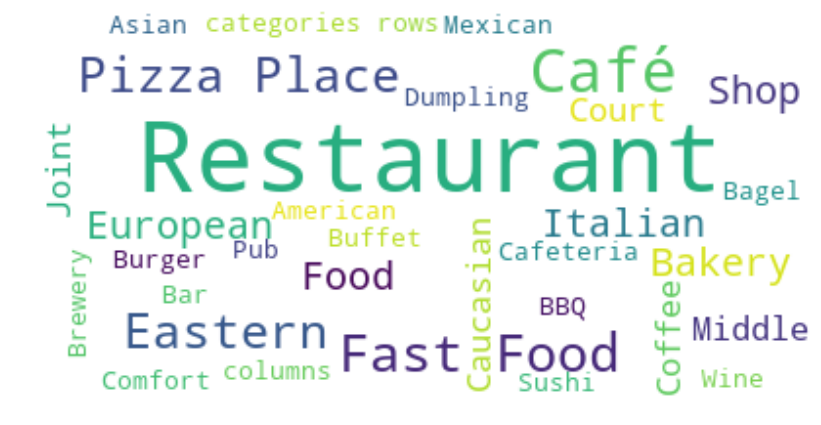

In [349]:
text = str(df_lunch[['categories']])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Price category of lunch restaurants in Yerevan

In [84]:
price_category=df_lunch.groupby(['price_category']).count()
price_category=price_category.T
price_category=price_category.drop(price_category.index[1:])
price_category = price_category[['Cheap', 'Moderate', 'Expensive', 'None']]
price_category 

price_category,Cheap,Moderate,Expensive,None
name,34,29,3,8


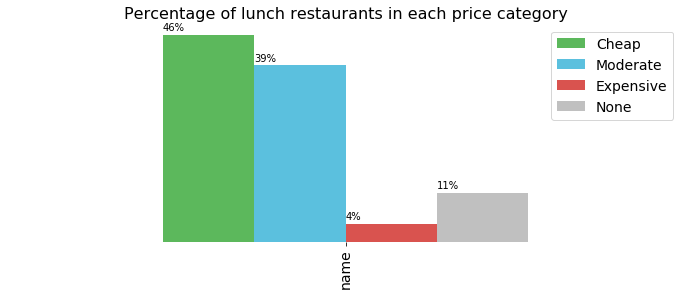

In [86]:
colors_list = ['#5cb85c', '#5bc0de','#d9534f','#C0C0C0']
ax = (price_category.div(price_category.sum(1), axis=0)).plot(kind='bar', figsize=(12,4), legend=True, fontsize=14, width=0.6, color=colors_list,edgecolor=None)
plt.legend(labels=price_category.columns,fontsize= 14)
ax.set_title("Percentage of lunch restaurants in each price category",fontsize=16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
plt.show()

Majority of lunch restaurants in downtown of Yerevan (almast 85%) are either cheap or moderate. Only 4% are expensive restaurants.

In [162]:
print('Average number of total checkins is ' + str(df_lunch['total_checkins'].astype(float).mean()))
print('Total checkins of the most popular restaurant is ' + str(df_lunch['total_checkins'].astype(float).max()))

Average number of total checkins is 1261.6734693877552
Total checkins of the most popular restaurant is 6058.0


###  Clustering of restaurants based on their location i.e. Lat & Lon
<div id="clustering">
    <b>DBSCAN</b> form sklearn library can runs DBSCAN clustering from vector array or distance matrix.<br>
    In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them. 
</div>

In [91]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_lunch[['lat','lng']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.25, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_lunch["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_lunch.head(5)

C:\Users\FASTcomputer\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,categories,address,lat,lng,id,distance,price_category,rating,lunch_menu,total_checkins,Clus_Db
0,Dargett Craft Brewery,Brewery,72 Aram Street,40.183607,44.508081,56fa99bc498eb97a3555d51b,771.1,Moderate,9.2,Lunch,NaN,0
1,Sherep,Restaurant,Amiryan Street 1,40.178465,44.511299,5a0ab674a92d986b90ada7f4,149.1,Moderate,9.1,Lunch,NaN,-1
2,Black Angus,Burger Joint,2/5 Abovyan St.,40.180202,44.514760,51fac327498e1422971b5db7,337.9,Cheap,8.5,Lunch,1287,1
3,Karas Hanrapetutyan Hraparak,Restaurant,Abovyan 1/1,40.179047,44.513476,5499cac4498e3fb7307472b6,173.0,Moderate,6.6,Lunch,NaN,1
4,Eat&Fit,Comfort Food Restaurant,Aram Street,40.183684,44.507400,59d89889b9ac3816d6ce2c9c,809.0,None,7.9,Lunch,NaN,0


In [92]:
print('The number of clusters is ' + str(realClusterNum))

The number of clusters is 14


### Visualization of clusters based on location

In [93]:
import os
os.environ["PROJ_LIB"]=r"C:\Users\FASTcomputer\Anaconda3\Library\share"; #fixr
from mpl_toolkits.basemap import Basemap

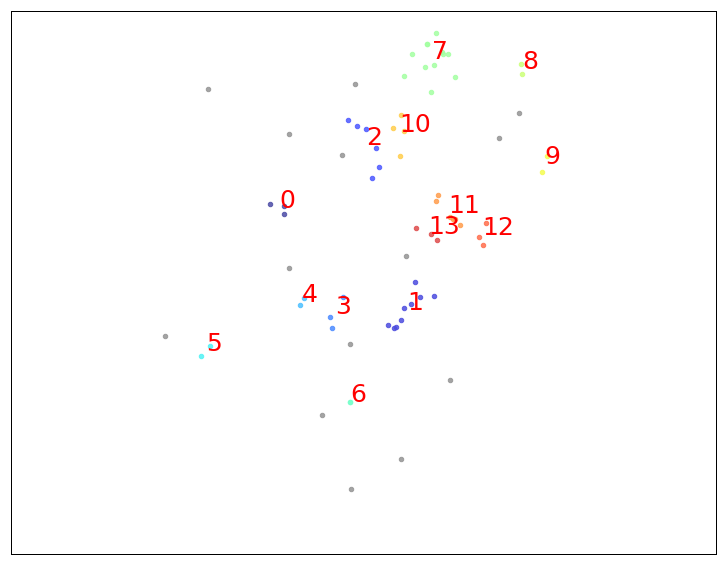

In [94]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=44.494701
ulon=44.529255
llat=40.170581
ulat=40.190920

df_lunch = df_lunch [(df_lunch['lng'] > llon) & (df_lunch['lng'] < ulon) & (df_lunch['lat'] > llat) &(df_lunch['lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
#my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# To collect data based on stations        

xs,ys = my_map(np.asarray(df_lunch['lng']), np.asarray(df_lunch['lat']))
df_lunch['xm']= xs.tolist()
df_lunch['ym'] =ys.tolist()


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_lunch[df_lunch.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)

In [95]:
count=df_lunch.groupby('Clus_Db').count()
count=count.reset_index()
count=count[['Clus_Db','name']]
count.rename({'name': 'res_numbers'}, axis=1, inplace=True)
count

,Clus_Db,res_numbers
0,-1,14
1,0,3
2,1,9
3,2,6
4,3,3
5,4,2
6,5,2
7,6,2
8,7,12
9,8,2


In [96]:
df_clusters=pd.merge(df_lunch, count[['Clus_Db','res_numbers']], on='Clus_Db', how='left')
df_clusters.tail()

,name,categories,address,lat,lng,id,distance,price_category,rating,lunch_menu,total_checkins,Clus_Db,xm,ym,res_numbers
68,The Italian,Italian Restaurant,Buzand,40.177116,44.516232,57695565498e8493068c4701,308.4,Moderate,7.8,Lunch,263,-1,2394.132740,950.943240,14
69,Pandok Yerevan (Պանդոկ Երևան),Caucasian Restaurant,29/2 Movses Khorenatsi St.,40.173019,44.511388,4c10a64181e976b091780feb,523.0,None,8.5,Lunch,256,-1,1855.485565,354.762249,14
70,Pizza Hut/KFC - Tigran Metz,Fast Food Restaurant,Tigran Mets 15,40.174144,44.513801,50616854e4b096c1ab7778a5,398.5,Cheap,6.3,Lunch,289,-1,2123.779898,518.492297,14
71,Vostan By Tsirani,Restaurant,Abovyan 8,40.180259,44.515429,590477f93d47912d4b29162b,376.0,Moderate,7.9,Lunch,NaN,1,2304.874876,1408.467748,9
72,Tiziano,Café,Piazza Grande,40.176283,44.511323,4ee71f064690f88942fa4f5c,187.3,Cheap,7.6,Lunch,1448,6,1848.255346,829.737307,2


### Filtering clusters with less than 4 lunch restaurants 

In [97]:
final_clusters=df_clusters[df_clusters['res_numbers']<4]
final_clusters=final_clusters.drop('xm', axis=1)
final_clusters=final_clusters.drop('ym', axis=1)
final_clusters.head()

,name,categories,address,lat,lng,id,distance,price_category,rating,lunch_menu,total_checkins,Clus_Db,res_numbers
0,Dargett Craft Brewery,Brewery,72 Aram Street,40.183607,44.508081,56fa99bc498eb97a3555d51b,771.1,Moderate,9.2,Lunch,NaN,0,3
4,Eat&Fit,Comfort Food Restaurant,Aram Street,40.183684,44.507400,59d89889b9ac3816d6ce2c9c,809.0,None,7.9,Lunch,NaN,0,3
7,Pandok Yerevan (Պանդոկ Երևան),Eastern European Restaurant,5 Amiryan St.,40.179042,44.510437,4d340c3598336dcba3c133f0,246.5,Moderate,8.6,Lunch,2043,3,3
8,Mayrig,Middle Eastern Restaurant,NaN,40.180195,44.510950,5b969e1a9411f20039a9e543,321.1,Moderate,7.7,Lunch,NaN,3,3
9,The Green Bean,Coffee Shop,10 Amiryan St.,40.180168,44.509049,4ff1b71ce4b02f36dc4ab4b0,417.7,Cheap,8.4,Lunch,2916,4,2


In [98]:
print('The number of final clusters to be analyzed is '+str(len(final_clusters['Clus_Db'].unique())))

The number of final clusters to be analyzed is 9


In [99]:
cluster_centers=final_clusters[['lat','lng','Clus_Db']].groupby('Clus_Db').mean()
cluster_centers=cluster_centers.reset_index()
cluster_centers

,Clus_Db,lat,lng
0,0,40.183536,44.507849
1,3,40.179569,44.510583
2,4,40.180036,44.508965
3,5,40.178190,44.504248
4,6,40.176285,44.511324
5,8,40.188757,44.519731
6,9,40.185193,44.520835
7,12,40.182524,44.517808
8,13,40.182570,44.515143


In [297]:
cluster_coords=cluster_centers.as_matrix(columns=['lat', 'lng'])

C:\Users\FASTcomputer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [298]:
cluster_coords[0]

array([40.18353576, 44.50784866])

###  Get offices nearby the lunch restaurants within 300m 

In [102]:
CLIENT_ID = 'QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D' #Foursquare ID
CLIENT_SECRET = 'H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO' #Foursquare Secret
VERSION = '20190901'
radius=300
LIMIT = 100
categoryId='4d4b7105d754a06372d81259,530e33ccbcbc57f1066bbfe4,4eb1bea83b7b6f98df247e06,4bf58dd8d48988d104941735,4bf58dd8d48988d124941735' 
 #College & University, States & Municipalities, Government Building, Medical Center, Office

In [103]:
url1=[]
for i,j in zip(final_clusters.lat, final_clusters.lng):
    url1.append('https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&intent=browse&radius={}&limit={}'\
    .format(categoryId,CLIENT_ID, CLIENT_SECRET, i, j, VERSION,radius, LIMIT)) 
url1[0:3]

['https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06372d81259,530e33ccbcbc57f1066bbfe4,4eb1bea83b7b6f98df247e06,4bf58dd8d48988d104941735,4bf58dd8d48988d124941735&client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&ll=40.183607,44.508081&v=20190901&intent=browse&radius=300&limit=100',
 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06372d81259,530e33ccbcbc57f1066bbfe4,4eb1bea83b7b6f98df247e06,4bf58dd8d48988d104941735,4bf58dd8d48988d124941735&client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TLLTGB0D&client_secret=H0V1EZJZLZ2QAWZTKOYEKNGHFEIYX1THIW3HRWUPXXZOXBPO&ll=40.18368428091806,44.50739998701114&v=20190901&intent=browse&radius=300&limit=100',
 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06372d81259,530e33ccbcbc57f1066bbfe4,4eb1bea83b7b6f98df247e06,4bf58dd8d48988d104941735,4bf58dd8d48988d124941735&client_id=QY1GYW23TQ2URAN0QCMUZ0BMVAV3CD41AE2HO3Z2TL

In [104]:
# assign relevant part of JSON to venues and tranform venues into a dataframe
venues1=[]
for i in url1:
    venues1.append(requests.get(i).json()['response']['venues'])
venues1[0]

[{'id': '574040e4498e6e2d58478c51',
  'name': 'Center of Plastic Surgery and Cosmetology',
  'location': {'address': 'Pushkin 56a',
   'lat': 40.185685,
   'lng': 44.509819,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.185685,
     'lng': 44.509819}],
   'distance': 274,
   'cc': 'AM',
   'city': 'Երևան',
   'state': 'Yerevan',
   'country': 'Հայաստան',
   'formattedAddress': ['Pushkin 56a', 'Երևան', 'Yerevan', 'Հայաստան']},
  'categories': [{'id': '52e81612bcbc57f1066b7a3b',
    'name': 'Acupuncturist',
    'pluralName': 'Acupuncturists',
    'shortName': 'Acupuncturist',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1569946174',
  'hasPerk': False},
 {'id': '51aefe7f498e2507b4f201d2',
  'name': 'Boulevard Plaza',
  'location': {'address': 'Arami St 64',
   'lat': 40.18311541683024,
   'lng': 44.50858440782626,
   'labeledLatLngs': [{'label': 'display',
   

In [105]:
x=[]
for i in venues1:
    for j in i:
        x.append(json_normalize(j))
x[0]

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '52e81612bcbc57f1066b7a3b', 'name': 'A...",False,574040e4498e6e2d58478c51,Pushkin 56a,AM,Երևան,Հայաստան,274,"[Pushkin 56a, Երևան, Yerevan, Հայաստան]","[{'label': 'display', 'lat': 40.185685, 'lng':...",40.185685,44.509819,Yerevan,Center of Plastic Surgery and Cosmetology,v-1569946174


In [106]:
office_lat=[]
office_lng=[]
office_name=[]
office_category=[]
office_id=[]
for i in x:
    office_lat.append(i['location.lat'][0])
for i in x:
    office_lng.append(i['location.lng'][0])
for i in x:
    office_name.append(i['name'][0])
for i in x:
    office_category.append(i['categories'][0][0].get('shortName'))
for i in x:
    office_id.append(i['id'][0])

In [130]:
df_offices = pd.DataFrame()
df_offices['id']=office_id
df_offices['category']=office_category
df_offices['name']=office_name
df_offices['lat']=office_lat
df_offices['lng']=office_lng

In [131]:
df_offices.drop_duplicates(subset='id',keep='first', inplace=True)

In [135]:
print('There are {} offices in the neighborhood of lunch restaurants'.format(len(df_offices['name'])))
df_offices[0:5]

There are 340 offices in the neighborhood of lunch restaurants


,id,category,name,lat,lng
0,574040e4498e6e2d58478c51,Acupuncturist,Center of Plastic Surgery and Cosmetology,40.185685,44.509819
1,51aefe7f498e2507b4f201d2,Office,Boulevard Plaza,40.183115,44.508584
2,4eaaa3ac6c250fcc743d49d9,Road,Arami Street | Արամի փողոց,40.183867,44.507565
3,52539d2811d229aba990f190,Neighborhood,Ամիրյան Փողոց,40.181089,44.507321
4,56b23526498eef7fdf1b9c1a,Office,joomag,40.186273,44.508030


In [136]:
#get coordinates 
office_coords = pd.DataFrame()
office_coords['lat']=df_offices['lat']
office_coords['lng']=df_offices['lng']
office_coords=office_coords.as_matrix(columns=['lat', 'lng'])

C:\Users\FASTcomputer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [137]:
office_coords[0:5]

array([[40.185685  , 44.509819  ],
       [40.18311542, 44.50858441],
       [40.18386685, 44.50756473],
       [40.181089  , 44.50732076],
       [40.18627265, 44.50802958]])

##  Analyze clusters

Analyze the clusters which have less than 4 lunch restaurants. Compare their average ratings, popularity,
calculate the number of offices operating within 250m as well as the other kind of restaurants which can be considered as
indirect competitors for lunch restaurants.

In [115]:
radius=250

### Cluster 0

In [299]:
cluster0_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[0])*1000), 1)<radius:
        cluster0_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[0])*1000), 1))
cluster0_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[0])*1000), 1)<radius:
        cluster0_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[0])*1000), 1))
print("Number of nearby offices is " + str(len(cluster0_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==0])))
print("Number of nearby food chains is " + str(len(cluster0_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==0]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==0]['total_checkins'].astype(float).mean()))

Number of nearby offices is 37
Number of lunch restaurants is 3
Number of nearby food chains is 10
Average rating of lunch restaurants is 7.7
Average checkins of lunch restaurants is nan


### Cluster 3

In [300]:
cluster3_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[1])*1000), 1)<radius:
        cluster3_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[1])*1000), 1))
cluster3_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[1])*1000), 1)<radius:
        cluster3_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[1])*1000), 1))
print("Number of nearby offices is " + str(len(cluster3_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==3])))
print("Number of nearby food chains is " + str(len(cluster3_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==3]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==3]['total_checkins'].astype(float).mean()))

Number of nearby offices is 44
Number of lunch restaurants is 3
Number of nearby food chains is 13
Average rating of lunch restaurants is 7.666666666666667
Average checkins of lunch restaurants is 1629.0


### Cluster 4

In [301]:
cluster4_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[2])*1000), 1)<radius:
        cluster4_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[2])*1000), 1))
cluster4_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[2])*1000), 1)<radius:
        cluster4_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[2])*1000), 1))
print("Number of nearby offices is " + str(len(cluster4_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==4])))
print("Number of nearby food chains is " + str(len(cluster4_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==4]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==4]['total_checkins'].astype(float).mean()))

Number of nearby offices is 36
Number of lunch restaurants is 2
Number of nearby food chains is 12
Average rating of lunch restaurants is 8.25
Average checkins of lunch restaurants is 2302.5


### Cluster 5

In [302]:
cluster5_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[3])*1000), 1)<radius:
        cluster5_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[3])*1000), 1))
cluster5_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[3])*1000), 1)<radius:
        cluster5_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[3])*1000), 1))
print("Number of nearby offices is " + str(len(cluster5_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==5])))
print("Number of nearby food chains is " + str(len(cluster5_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==5]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==5]['total_checkins'].astype(float).mean()))

Number of nearby offices is 17
Number of lunch restaurants is 2
Number of nearby food chains is 4
Average rating of lunch restaurants is 6.45
Average checkins of lunch restaurants is nan


### Cluster 6

In [303]:
cluster6_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[4])*1000), 1)<radius:
        cluster6_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[4])*1000), 1))
cluster6_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[4])*1000), 1)<radius:
        cluster6_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[4])*1000), 1))
print("Number of nearby offices is " + str(len(cluster6_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==6])))
print("Number of nearby food chains is " + str(len(cluster6_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==6]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==6]['total_checkins'].astype(float).mean()))

Number of nearby offices is 47
Number of lunch restaurants is 2
Number of nearby food chains is 9
Average rating of lunch restaurants is 7.05
Average checkins of lunch restaurants is 998.0


### Cluster 8

In [304]:
cluster8_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[5])*1000), 1)<radius:
        cluster8_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[5])*1000), 1))
cluster8_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[5])*1000), 1)<radius:
        cluster8_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[5])*1000), 1))
print("Number of nearby offices is " + str(len(cluster8_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==8])))
print("Number of nearby food chains is " + str(len(cluster8_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==8]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==8]['total_checkins'].astype(float).mean()))

Number of nearby offices is 39
Number of lunch restaurants is 2
Number of nearby food chains is 15
Average rating of lunch restaurants is 8.600000000000001
Average checkins of lunch restaurants is 1421.0


### Cluster 9

In [305]:
cluster9_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[6])*1000), 1)<radius:
        cluster9_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[6])*1000), 1))
cluster9_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[6])*1000), 1)<radius:
        cluster9_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[6])*1000), 1))
print("Number of nearby offices is " + str(len(cluster9_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==9])))
print("Number of nearby food chains is " + str(len(cluster9_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==9]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==9]['total_checkins'].astype(float).mean()))

Number of nearby offices is 35
Number of lunch restaurants is 2
Number of nearby food chains is 8
Average rating of lunch restaurants is 8.1
Average checkins of lunch restaurants is 2007.0


### Cluster 12

In [306]:
cluster12_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[7])*1000), 1)<radius:
        cluster12_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[7])*1000), 1))
cluster12_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[7])*1000), 1)<radius:
        cluster12_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[7])*1000), 1))
print("Number of nearby offices is " + str(len(cluster12_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==12])))
print("Number of nearby food chains is " + str(len(cluster12_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==12]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==12]['total_checkins'].astype(float).mean()))

Number of nearby offices is 36
Number of lunch restaurants is 3
Number of nearby food chains is 16
Average rating of lunch restaurants is 7.5
Average checkins of lunch restaurants is 930.3333333333334


### Cluster 13

In [307]:
cluster13_nearby_offices=[]
for i,j in zip(df_offices['lat'],df_offices['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[8])*1000), 1)<radius:
        cluster13_nearby_offices.append(round((mpu.haversine_distance([i,j], claster_coords[8])*1000), 1))
cluster13_nearby_food=[]
for i,j in zip(df_final['lat'],df_final['lng']):
    if round((mpu.haversine_distance([i,j], cluster_coords[8])*1000), 1)<radius:
        cluster13_nearby_food.append(round((mpu.haversine_distance([i,j], claster_coords[8])*1000), 1))
print("Number of nearby offices is " + str(len(cluster13_nearby_offices)))
print("Number of lunch restaurants is " + str(len(final_clusters[final_clusters['Clus_Db']==13])))
print("Number of nearby food chains is " + str(len(cluster13_nearby_food)))
print('Average rating of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==13]['rating'].astype(float).mean()))
print('Average checkins of lunch restaurants is ' + str(final_clusters[final_clusters['Clus_Db']==13]['total_checkins'].astype(float).mean()))

Number of nearby offices is 41
Number of lunch restaurants is 3
Number of nearby food chains is 29
Average rating of lunch restaurants is 7.766666666666666
Average checkins of lunch restaurants is 1045.3333333333333


## DBSCAN clustering of offices

In [191]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_offices[['lat','lng']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.20, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_offices["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_offices.head(5)

,id,category,name,lat,lng,Clus_Db,xm,ym
0,574040e4498e6e2d58478c51,Acupuncturist,Center of Plastic Surgery and Cosmetology,40.185685,44.509819,0,1681.044109,2198.160187
1,51aefe7f498e2507b4f201d2,Office,Boulevard Plaza,40.183115,44.508584,1,1543.763788,1824.161434
2,4eaaa3ac6c250fcc743d49d9,Road,Arami Street | Արամի փողոց,40.183867,44.507565,-1,1430.380638,1933.529845
3,52539d2811d229aba990f190,Neighborhood,Ամիրյան Փողոց,40.181089,44.507321,-1,1403.252139,1529.228952
4,56b23526498eef7fdf1b9c1a,Office,joomag,40.186273,44.508030,-1,1482.070032,2283.693447


In [192]:
count1=df_offices.groupby('Clus_Db').count()
count1=count1.reset_index()
count1=count1[['Clus_Db','name']]
count1.rename({'name': 'res_numbers'}, axis=1, inplace=True)
count1

,Clus_Db,res_numbers
0,-1,64
1,0,22
2,1,18
3,2,15
4,3,7
5,4,46
6,5,10
7,6,5
8,7,24
9,8,6


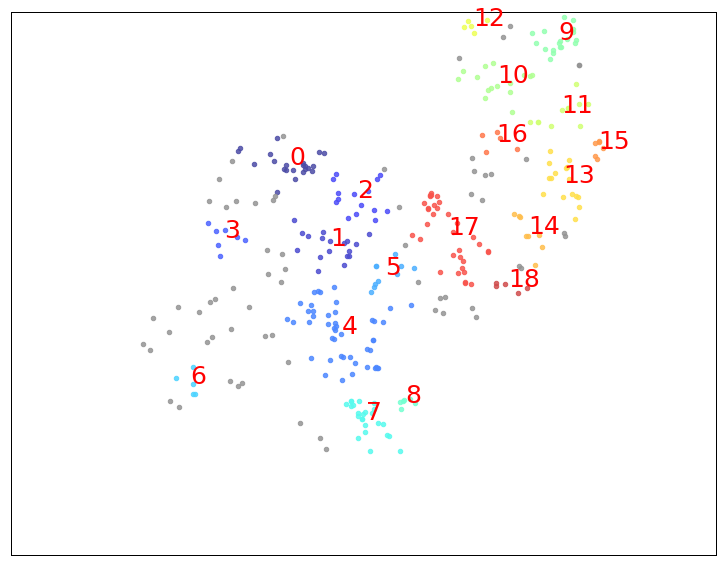

In [193]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=44.494701
ulon=44.529255
llat=40.170581
ulat=40.190920

df_offices = df_offices[(df_offices['lng'] > llon) & (df_offices['lng'] < ulon) & (df_offices['lat'] > llat) &(df_offices['lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
#my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# To collect data based on stations        

xs,ys = my_map(np.asarray(df_offices['lng']), np.asarray(df_offices['lat']))
df_offices['xm']= xs.tolist()
df_offices['ym'] =ys.tolist()


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_offices[df_offices.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)

### Select the clusters with the highest number of offices

In [217]:
selected=df_offices[(df_offices.Clus_Db==0) |(df_offices.Clus_Db==4) | (df_offices.Clus_Db==7) | (df_offices.Clus_Db==17)]
selected[0:5]

,id,category,name,lat,lng,Clus_Db,xm,ym
0,574040e4498e6e2d58478c51,Acupuncturist,Center of Plastic Surgery and Cosmetology,40.185685,44.509819,0,1681.044109,2198.160187
5,516948a2498e95cfb6907150,Office,EKENG,40.186212,44.507747,0,1450.693483,2274.838979
7,4f4e3444e4b082dc5c987d52,Office,Aspar Wild Tour,40.185598,44.507400,0,1412.106381,2185.535542
10,4fad3087e4b0346fb5c2654a,Office,SPRING PR,40.185329,44.507580,0,1432.028013,2146.385944
11,512c7442e8890588e0601071,Office,X Football Scout,40.184988,44.508523,0,1536.907637,2096.732860


In [227]:
office_centers=selected[['lat','lng','Clus_Db']].groupby('Clus_Db').mean()
office_centers=office_centers.reset_index()
office_centers

,Clus_Db,lat,lng
0,0,40.185230,44.508355
1,4,40.178901,44.510926
2,7,40.175690,44.512122
3,17,40.182594,44.516120


In [228]:
office_centers=office_centers.as_matrix(columns=['lat', 'lng'])
office_centers

C:\Users\FASTcomputer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[40.18522956, 44.50835507],
       [40.17890071, 44.51092632],
       [40.17568987, 44.51212193],
       [40.18259379, 44.51612042]])

### Match selected restaurant clusters and office clusters

In [245]:
cluster0_offices0=[]
for i,j in zip(final_clusters[final_clusters['Clus_Db']==0]['lat'],final_clusters[final_clusters['Clus_Db']==0]['lng']):
        cluster0_offices0.append(round((mpu.haversine_distance([i,j], office_centers[0])*1000), 1))
cluster0_offices0

[181.9, 190.0, 214.2]

In [277]:
cluster4_offices17=[]
for i,j in zip(final_clusters[final_clusters['Clus_Db']==9]['lat'],final_clusters[final_clusters['Clus_Db']==9]['lng']):
        cluster4_offices17.append(round((mpu.haversine_distance([i,j], office_centers[3])*1000), 1))
cluster4_offices17

[466.7, 522.1]

In [276]:
cluster6_offices7=[]
for i,j in zip(final_clusters[final_clusters['Clus_Db']==6]['lat'],final_clusters[final_clusters['Clus_Db']==6]['lng']):
        cluster6_offices7.append(round((mpu.haversine_distance([i,j], office_centers[2])*1000), 1))
cluster6_offices7

[94.8, 94.6]

In [334]:
cluster9_offices17=[]
for i,j in zip(final_clusters[final_clusters['Clus_Db']==12]['lat'],final_clusters[final_clusters['Clus_Db']==12]['lng']):
        cluster9_offices17.append(round((mpu.haversine_distance([i,j], office_centers[3])*1000), 1))
cluster9_offices17

[128.4, 163.6, 152.7]

In [330]:
cluster6_offices1=[]
for i,j in zip(final_clusters[final_clusters['Clus_Db']==6]['lat'],final_clusters[final_clusters['Clus_Db']==6]['lng']):
        cluster6_offices1.append(round((mpu.haversine_distance([i,j], office_centers[1])*1000), 1))
cluster6_offices1

[292.6, 293.1]

## The best locations for opening a restaurant

In [316]:
cluster_coords

array([[40.18353576, 44.50784866],
       [40.17956893, 44.51058251],
       [40.18003619, 44.50896514],
       [40.17818958, 44.50424763],
       [40.17628504, 44.51132416],
       [40.18875679, 44.51973138],
       [40.18519269, 44.52083512],
       [40.18252358, 44.51780762],
       [40.1825698 , 44.51514324]])

In [337]:
# Folium Library for visualizing data on interactive map
# Pandas Library for fast, flexible, and expressive data structures designed
import folium
from geopy.geocoders import Nominatim, ArcGIS, GoogleV3 # Geocoder APIs
g = Nominatim() 

C:\Users\FASTcomputer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


In [338]:
# Reverse Geocoding - lat/long to Address
cluster0_address = g.reverse((cluster_coords[0]), timeout=10) # Lat, Long to reverse geocode
cluster6_address = g.reverse((cluster_coords[4]), timeout=10) # Lat, Long to reverse geocode
cluster9_address = g.reverse((cluster_coords[6]), timeout=10) # Lat, Long to reverse geocode
print(cluster0_address.address)
print(cluster6_address.address)
print(cluster9_address.address)

76, Արամի փողոց, Կենտրոն, Երևան, 0002, Հայաստան
10, Վազգեն Սարգսյանի փողոց, Կենտրոն, Երևան, 0010, Հայաստան
30, Աբովյան փողոց, Կենտրոն, Երևան, 001, Հայաստան


# <span style="color:#002e63"> Results and Discussion <a name="results"></a></span>

Our analysis shows that although there is a great number of restaurants as well as lunch restaurants in yerevan downtown (~1500m from Republic Square), there are still some areas with low restaurant density compared to the officies operating nearby (within 250-300m). Highest concentration of restaurants was detected in Abovyan street, close to the Republic Square and in the neighborhood of Opera House, whereas in the South and South-West of the city the number of lunch restaurants and overall restaurants is comparably small. So, we focused our attention to above mentioned areas as potential places for opening a lunch restaurant. However, in order to come up to a best solution we have taken into consideration several other important factors as well. One of the deciding factors is affordability as our target customers are office workers. However, analysing the price categories of lunch restaurants it was evident that only 4% are considered as expensive, whereas 46% of the restaurants are cheap. To move forward and find candidate areas which will meet our requirements, we have used DBSCAN clustering algorithm to  group lunch restaurants setting the distance between the two points 250m. Then, we have skipped those clusters which contain more than three restaurants close to each other. 

After directing our attention to this more narrow area of interest we analyzed our clusters based on several factors. In order to consider the competition we have calculated the number of overall restaurants in each cluster. As a proxy of demand factor we have taken into consideration the number of offices (College & University, States & Municipalities, Government Building, Medical Center, Office) in surrounding area as it shows how overcrowded the area is. The other important factors are the average rating ane the average checkins in each cluster which shows the overall customer satisfaction level and popularity of the restaurants operating within the same cluster.


Having chosen some candidate areas based the factors we have mentioned earlier, we tried to analyze the offices operating in downtown of Yerevan in order to filter candidate areas or to be sure that our selected areas can be profitable due to the concentration of office workers in that areas. Recommended places, however, should be considered only as a starting point for more detailed analysis which could eventually result in location which has not only lower nearby competition but also other factors taken into account and all other relevant conditions met.

# <span style="color:#002e63"> Conclusion <a name="conclusion"></a></span>

Purpose of this project was to identify areas in Yerevan center with low number of lunch restaurants in order to aid stakeholders in narrowing down the search for optimal location for a new lunch restaurant. By getting restaurant density distribution from Foursquare data we have first filtered lunch restaurants, and then generated extensive collection of locations which satisfy some important requirements. Clustering of those locations was performed in order to create major zones of interest and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.
​
Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like detailed analysis of competitors, proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.